In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
df_nuevo = df[['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A']]
len(df_nuevo)

71404

In [3]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '-1'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(float)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)
df_nuevo

C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_11376\1884883793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_11376\1884883793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\PC EAGLE\AppData\Local\Temp\ipykernel_11376\1884883793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
0,88,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
1,64,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
4,22,2,8,1,22,0,18,0,1.0,99999.0,-1,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71399,54,2,2,2,0,0,0,0,NaN,-1.0,-1,0.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [4]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [5]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(48)
        else:
            if x == 2:
                res.append(21)
            else:
                if x == 3:
                    res.append(10)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_nuevo = df_nuevo.loc[df_nuevo['ganancia_hora'] <= 150]
df_nuevo = df_nuevo.loc[df_nuevo['tot_horas'] <= 70]

In [6]:
def grupos(df,minimo,maximo,num_grupos):
    minimo = minimo - 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    res = []
    for x in df:
        y = x - minimo
        y = int(y/tam_grupo)
        res.append(y)
    return res
def imprimeGrupo(minimo,maximo,num_grupos):
    minimo = minimo - 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    for i in range(num_grupos):
        st = 'grupo '
        x = minimo + i * tam_grupo
        y = minimo + (i + 1) * tam_grupo
        print('grupo ' + str(i) + ': (' + str(x) + ',' + str(y) +']')

Separar la poblacion en niveles educativos (NIV) 
0 es sin educación
1-3 básica
4-6 media
7-8 superior

In [7]:
minimo = min(df_nuevo['tot_horas'])
maximo = max(df_nuevo['tot_horas'])
num_grupo = 15
df_nuevo['grupo_horas'] = grupos(df_nuevo['tot_horas'],minimo,maximo,num_grupo)
print('grupos de horas')
imprimeGrupo(minimo,maximo,num_grupo)
print('-------------------------------------------------------------------')
minimo = min(df_nuevo['ganancia_hora'])
maximo = max(df_nuevo['ganancia_hora'])
num_grupo = 20
df_nuevo['grupo_ganancia_hora'] = grupos(df_nuevo['ganancia_hora'],minimo,maximo,num_grupo)
print('grupos de ganacia por hora')
imprimeGrupo(minimo,maximo,num_grupo)
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

grupos de horas
grupo 0: (0.0,4.666666666666667]
grupo 1: (4.666666666666667,9.333333333333334]
grupo 2: (9.333333333333334,14.0]
grupo 3: (14.0,18.666666666666668]
grupo 4: (18.666666666666668,23.333333333333336]
grupo 5: (23.333333333333336,28.0]
grupo 6: (28.0,32.66666666666667]
grupo 7: (32.66666666666667,37.333333333333336]
grupo 8: (37.333333333333336,42.0]
grupo 9: (42.0,46.66666666666667]
grupo 10: (46.66666666666667,51.333333333333336]
grupo 11: (51.333333333333336,56.0]
grupo 12: (56.0,60.66666666666667]
grupo 13: (60.66666666666667,65.33333333333334]
grupo 14: (65.33333333333334,70.0]
-------------------------------------------------------------------
grupos de ganacia por hora
grupo 0: (-0.9479166666666666,6.599479166666666]
grupo 1: (6.599479166666666,14.146875]
grupo 2: (14.146875,21.69427083333333]
grupo 3: (21.69427083333333,29.241666666666664]
grupo 4: (29.241666666666664,36.7890625]
grupo 5: (36.7890625,44.33645833333333]
grupo 6: (44.33645833333333,51.883854166666666

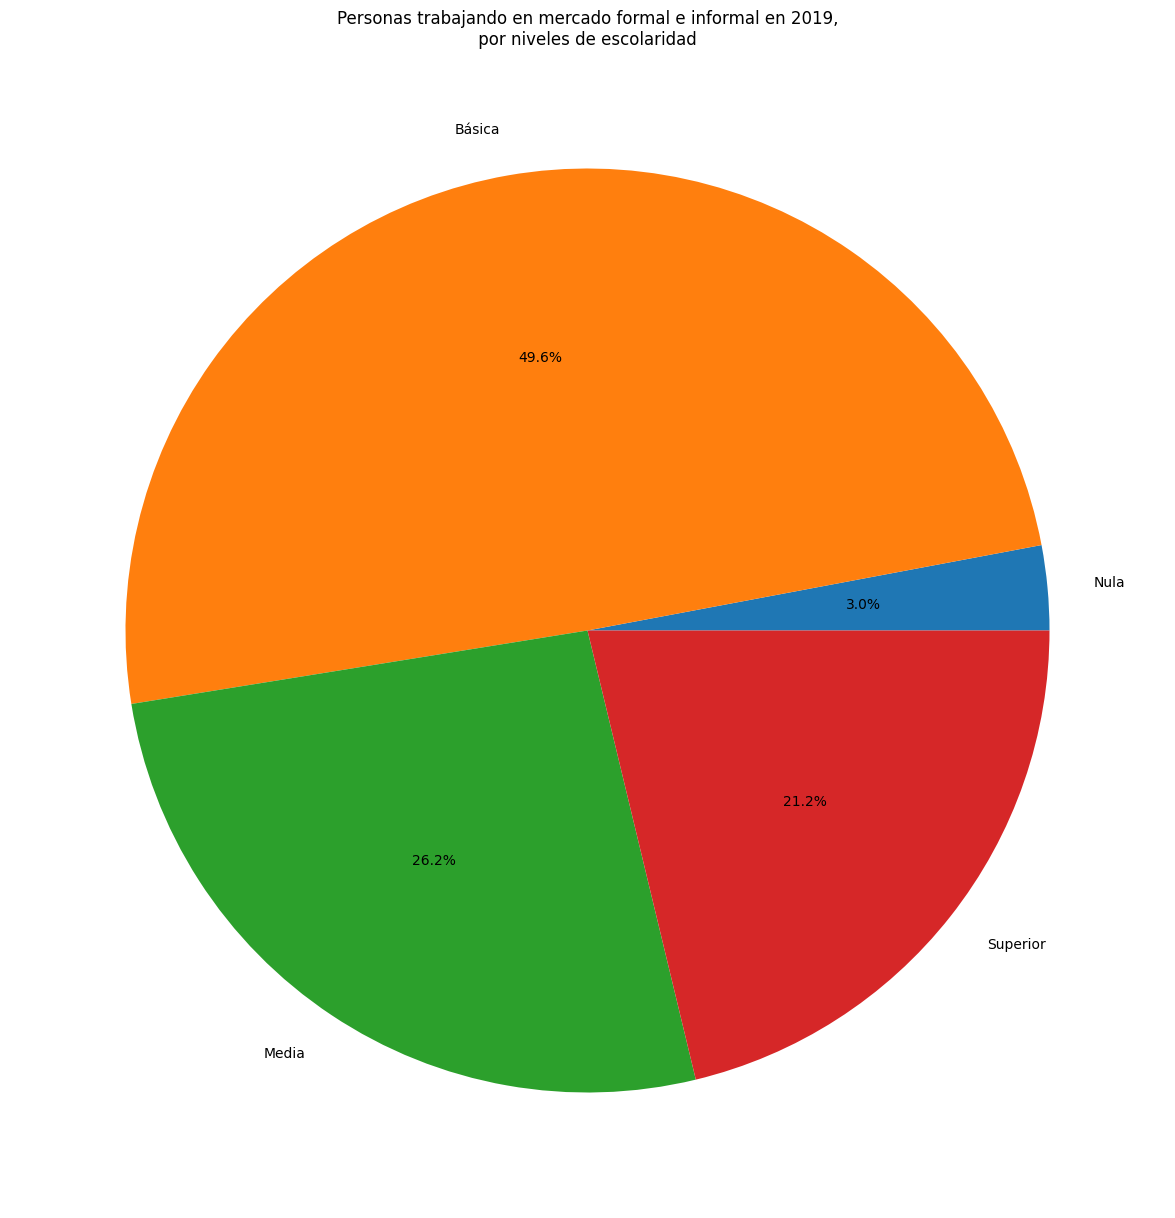

In [8]:
tot_muestra = len(df_nuevo)
tot_nula = len(df_nula)
tot_basica = len(df_basica)
tot_media = len(df_media)
tot_superior = len(df_superior)

arr_pie = [tot_nula/tot_muestra,tot_basica/tot_muestra,tot_media/tot_muestra,tot_superior/tot_muestra]
mylabels = ['Nula','Básica','Media','Superior']
plt.figure(figsize=(15,15))
plt.title("Personas trabajando en mercado formal e informal en 2019,\n por niveles de escolaridad ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

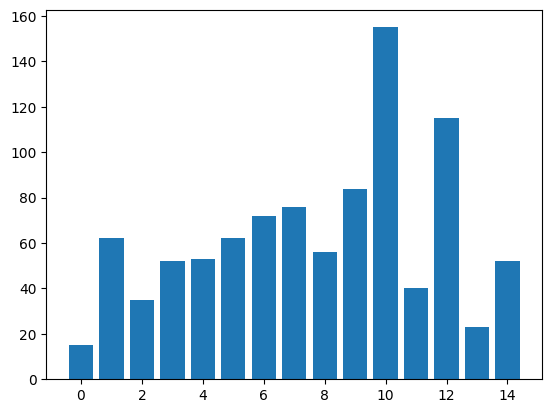

In [9]:
y = df_nula['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 20 artists>

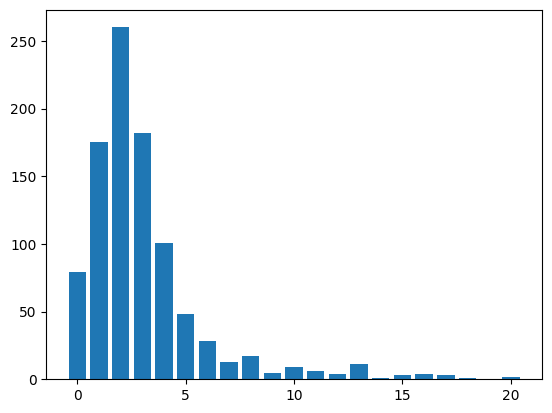

In [10]:
y = df_nula['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

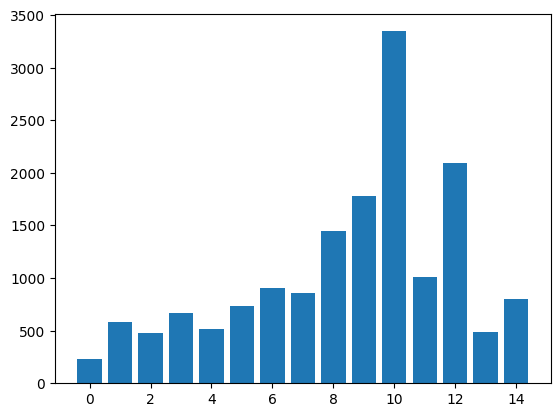

In [11]:
y = df_basica['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

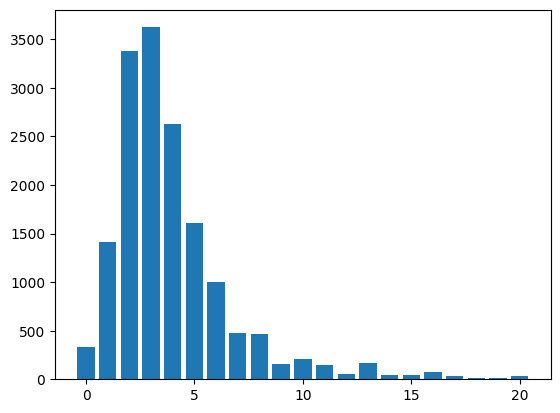

In [12]:
y = df_basica['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

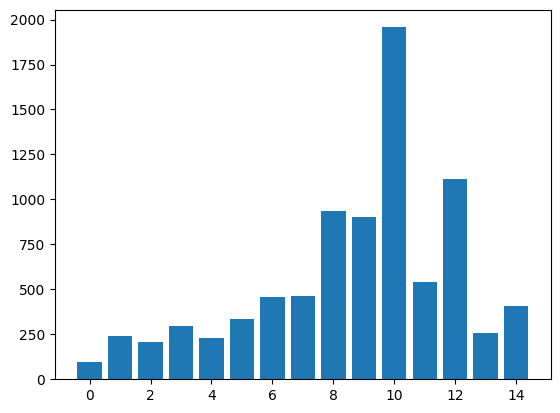

In [13]:
y = df_media['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

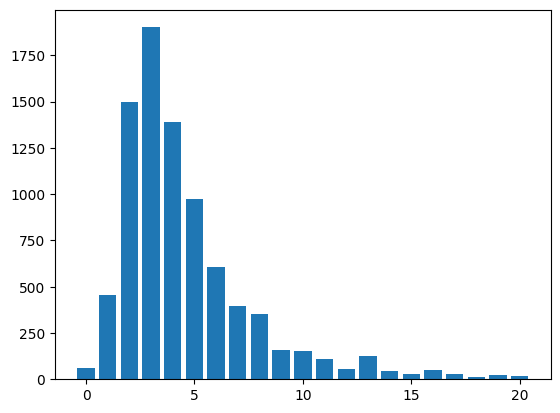

In [14]:
y = df_media['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

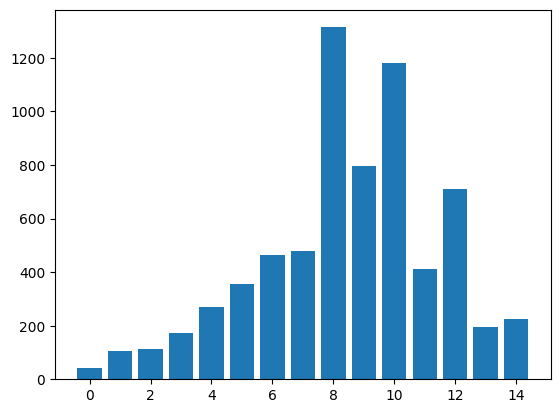

In [15]:
y = df_superior['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

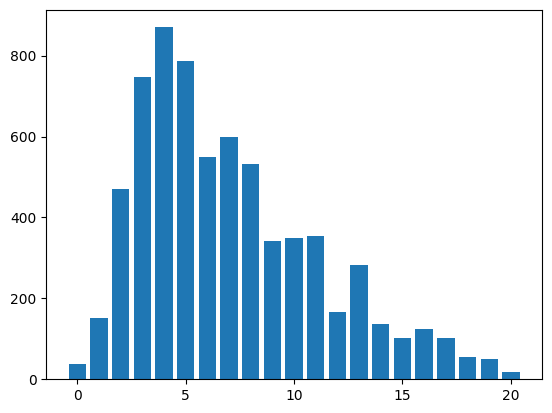

In [16]:
y = df_superior['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [17]:
def s2df(df):
    
    n = len(df)
    media = np.mean(df)
    s2 = y - media
    s2 = np.dot(s2,s2)
    s2 = s2 / (n-1)
    
    return s2

In [18]:
def intervaloDeConfVarDesc(df,alfa):
    
    res = []
    n = len(df)
    grados_de_libertad = n - 1
    media = np.mean(df)
    s2 = s2df(df)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    sn = s2 / n
    sn = pow(sn,1/2)
    res.append((media - sn * res_t))
    res.append((media + sn * res_t))
    
    return res

def intervaloDeConfDifMedias(x,alfa):
    
    res = []
    df_1 = x[0]
    df_2 = x[1]
    n1 = len(df_1)
    n2 = len(df_2)
    grados_de_libertad = n1 + n2 - 2
    media1 = np.mean(df_1)
    media2 = np.mean(df_2)
    dif = media1 - media2
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    s2p = ((n1 * s21) + (n2 * s22))/grados_de_libertad
    sp = pow(s2p,1/2)
    rn = (1/n1) + (1/n2)
    rn = pow(rn,1/2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append((dif - res_t * sp * rn))
    res.append((dif + res_t * sp * rn))
    
    return res

In [19]:
def arrInterConfianza(metodo,arr,alfa):
    res = []
    for x in arr:
        
        res.append(metodo(x,alfa))
        
    return res

In [20]:
alfa = .05
arr_horas = [df_nula['tot_horas'],df_basica['tot_horas'],df_media['tot_horas'],df_superior['tot_horas']]
arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [21]:
arr_inter_horas

[[34.44755626097293, 41.791169229223144],
 [41.64845738183556, 42.083086354575194],
 [42.51430311075096, 43.33446561528562],
 [41.51013118677954, 42.524881506053866]]

In [22]:
arr_inter_pago_hora

[[22.07270699579509, 29.589567342356258],
 [32.47150564662909, 32.91378100448282],
 [36.93639787757951, 37.76530542109188],
 [55.48862675232128, 56.47671027842611]]

Licenciatura vs maestria y doctorado

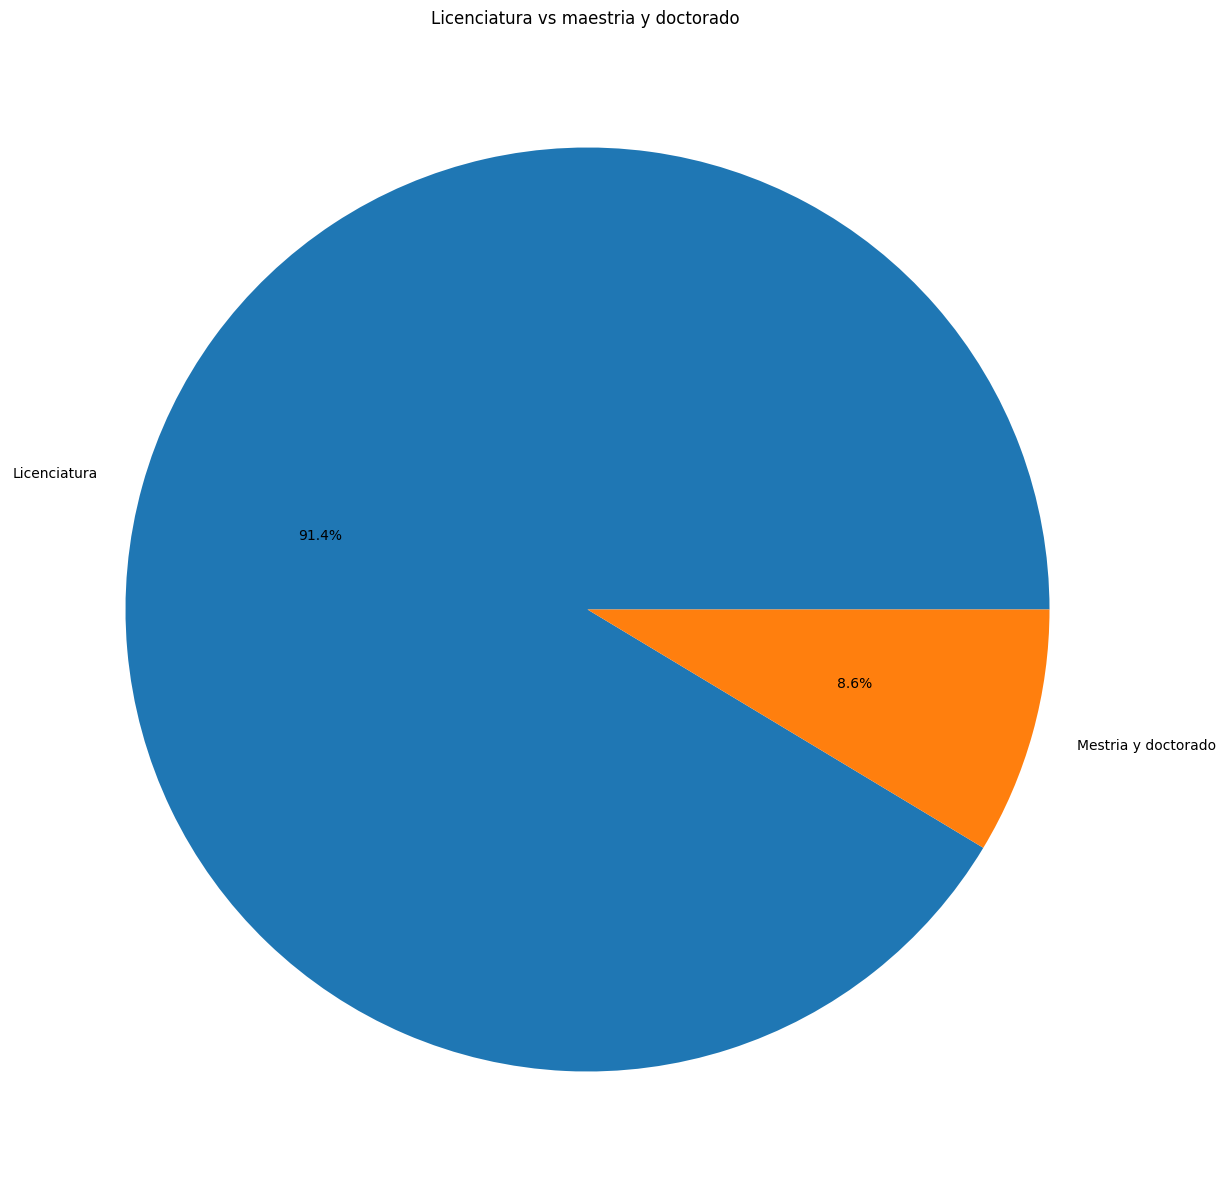

In [23]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_mestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]
tot_licenciatura = len(df_licenciatura)
tot_mestria_doctorado = len(df_mestria_doctorado)
arr_pie = [tot_licenciatura/tot_superior,tot_mestria_doctorado/tot_superior]
mylabels = ['Licenciatura','Mestria y doctorado']

plt.figure(figsize=(15,15))
plt.title("Licenciatura vs maestria y doctorado ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

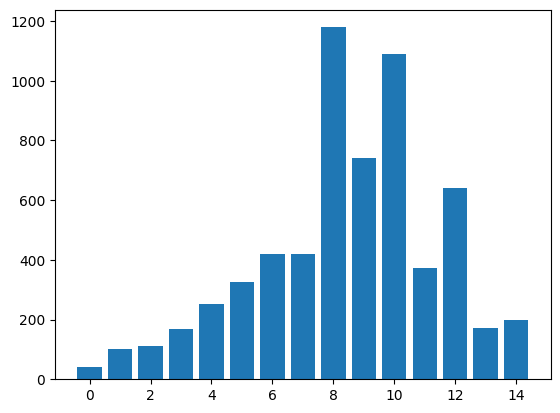

In [24]:
y = df_licenciatura['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

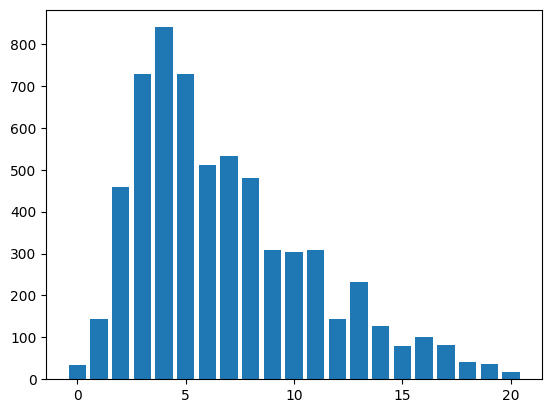

In [25]:
y = df_licenciatura['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 13 artists>

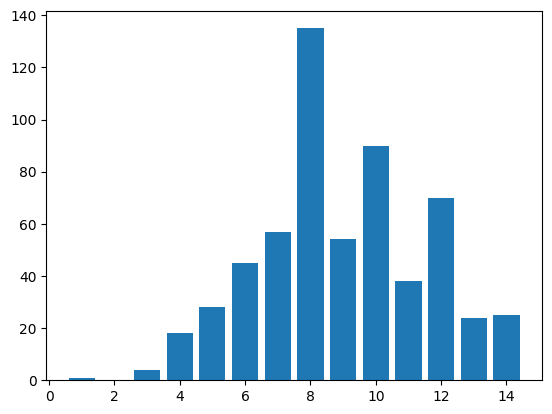

In [26]:
y = df_mestria_doctorado['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 20 artists>

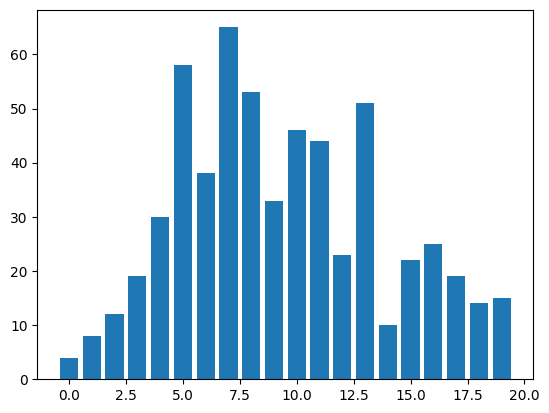

In [27]:
y = df_mestria_doctorado['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [28]:
alfa = .05
arr_horas = [df_licenciatura['tot_horas'],df_mestria_doctorado['tot_horas']]
arr_pago_hora = [df_licenciatura['ganancia_hora'],df_mestria_doctorado['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [29]:
arr_inter_horas

[[41.77075085809108, 41.83133815189984],
 [43.965823532109354, 44.65494613399137]]

In [30]:
arr_inter_pago_hora

[[54.2801559678798, 54.36590493571821], [72.85321751199109, 74.27165051584481]]

In [31]:
x = [df_licenciatura['ganancia_hora'],df_mestria_doctorado['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[-19.497854696126982, -18.980952428110907]

Hombres vs mujeres

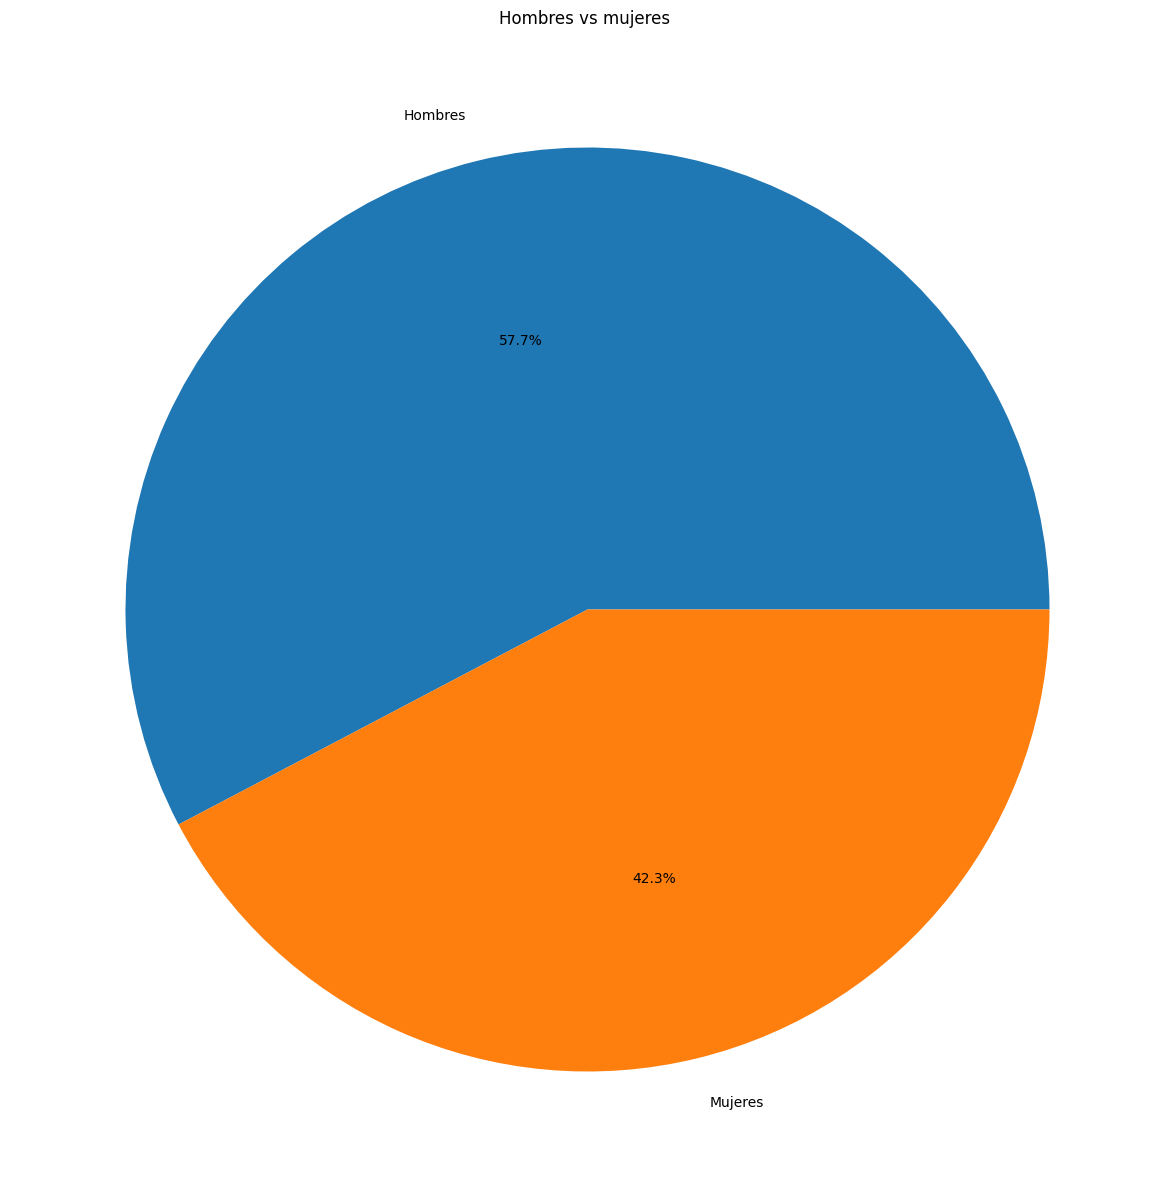

In [32]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]
tot_hombres = len(df_hombres)
tot_mujeres = len(df_mujeres)
arr_pie = [tot_hombres/tot_muestra,tot_mujeres/tot_muestra]
mylabels = ['Hombres','Mujeres']

plt.figure(figsize=(15,15))
plt.title("Hombres vs mujeres ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

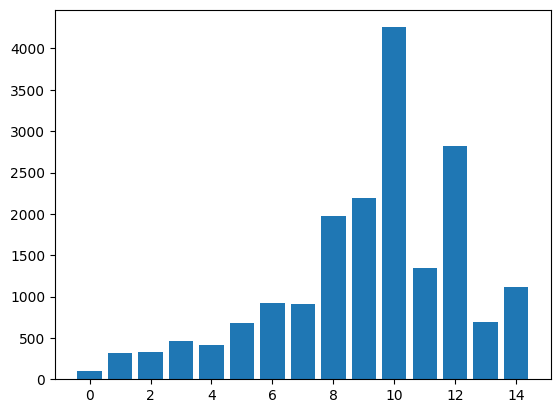

In [33]:
y = df_hombres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

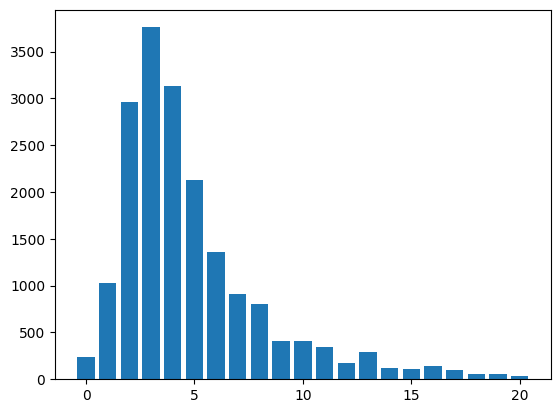

In [34]:
y = df_hombres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

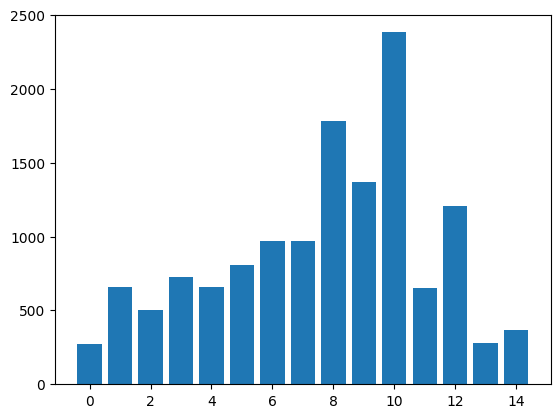

In [35]:
y = df_mujeres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

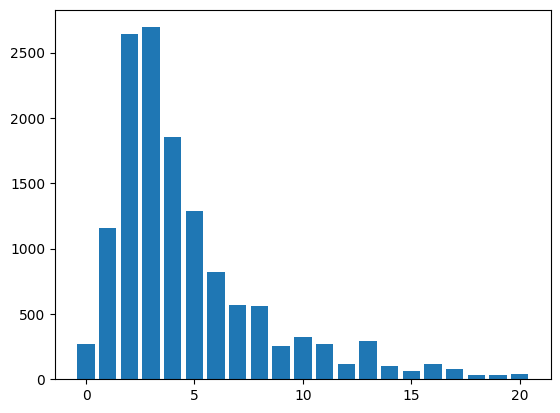

In [36]:
y = df_mujeres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [37]:
alfa = .05
arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [38]:
arr_inter_horas

[[44.70340811830236, 45.67804981084906],
 [37.13199633465958, 38.46762134051135]]

In [39]:
arr_inter_pago_hora

[[38.73038431949792, 39.70849676638145],
 [37.22033395911247, 38.555888617852766]]

In [40]:
x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)
dif_media_horas

[6.584152913868309, 8.197687340112182]

In [41]:
x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[0.5231519310262166, 2.139506577887918]

Formal vs informal

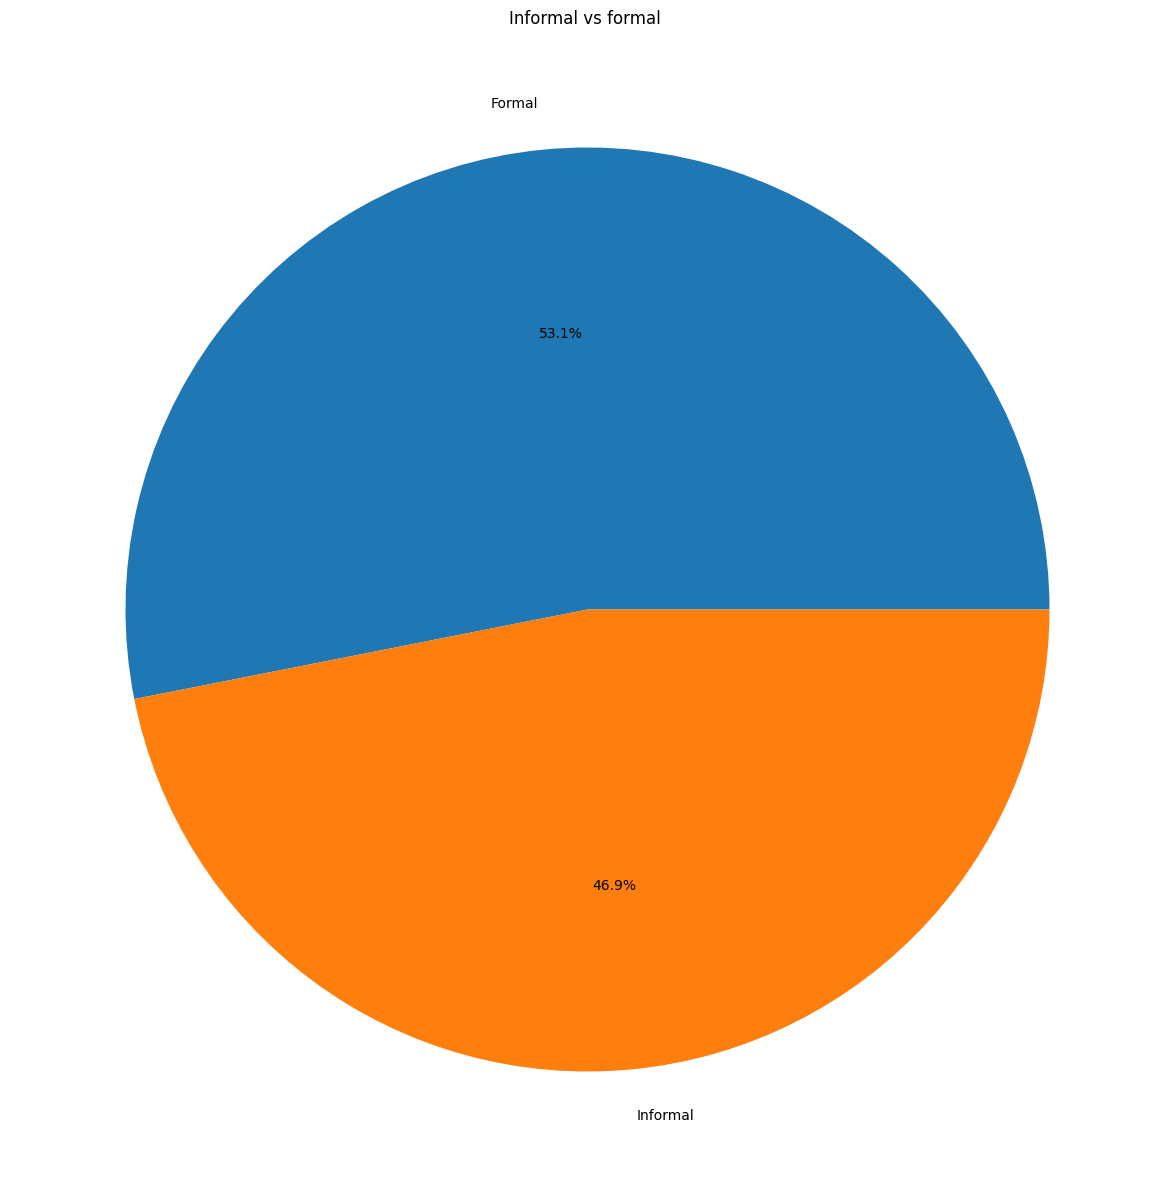

In [43]:
df_formal = df_nuevo.loc[df_nuevo['P5_6_6'] == 1.0]
df_informal = df_nuevo.loc[df_nuevo['P5_6_6'] == 2.0]

tot_formal = len(df_formal)
tot_informal = len(df_informal)
arr_pie = [tot_formal/tot_muestra,tot_informal/tot_muestra]
mylabels = ['Formal','Informal']

plt.figure(figsize=(15,15))
plt.title("Informal vs formal ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

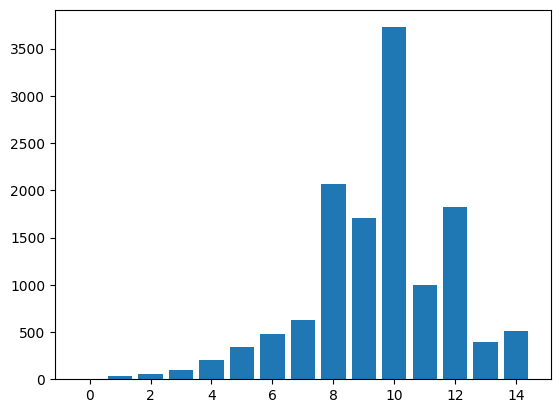

In [44]:
y = df_formal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

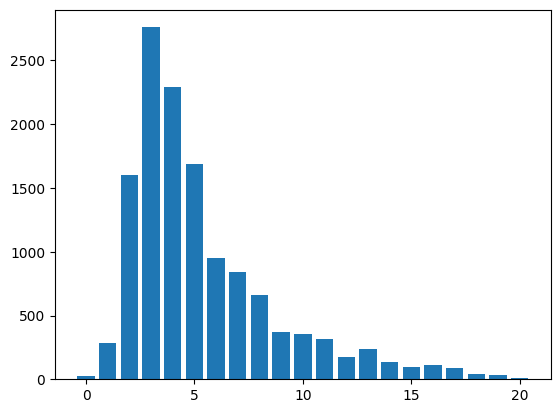

In [45]:
y = df_formal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

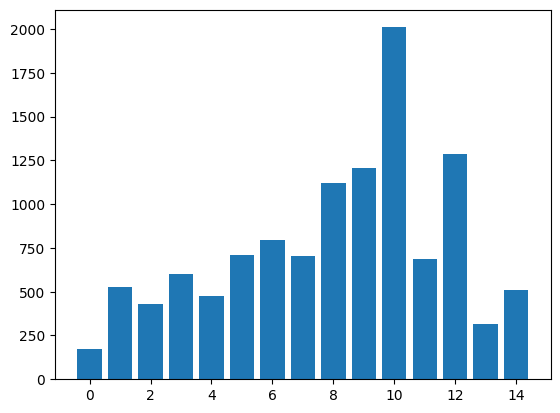

In [46]:
y = df_informal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 21 artists>

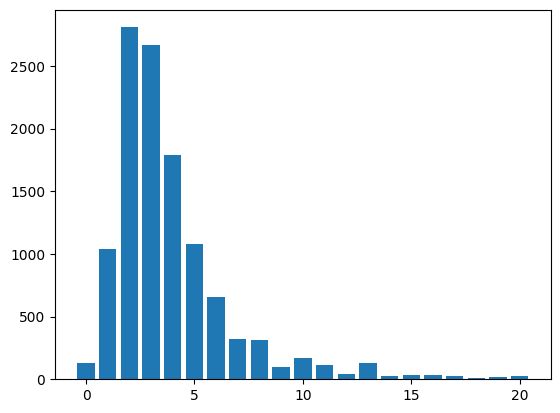

In [47]:
y = df_informal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

In [48]:
alfa = .05
arr_horas = [df_formal['tot_horas'],df_informal['tot_horas']]
arr_pago_hora = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

In [49]:
arr_inter_horas

[[46.06760217089023, 47.414745067277885],
 [38.81657585048053, 40.347915207275676]]

In [50]:
arr_inter_pago_hora

[[42.54735058221594, 43.896982623879936],
 [31.333209516710937, 32.87062016481718]]

In [51]:
x = [df_formal['tot_horas'],df_informal['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)
dif_media_horas

[6.143322188211416, 8.174533992200493]

In [52]:
x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)
dif_media_ganancia

[10.101689681962382, 12.138813842605375]